<a href="https://colab.research.google.com/github/eileennnnjin/CSE-163/blob/master/Section_3_Handout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Run the following code before working on any problem to import util functions used to test your code

In [0]:
import requests

def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse163/19sp/files/section/'
          + '04-18/cancer.csv', 'cancer.csv')
save_file('https://courses.cs.washington.edu/courses/cse163/20wi/files/section/'
          + 'section02/cse163_utils.py', 'cse163_utils.py')

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from cse163_utils import assert_equals, check_approx_equals

# Problem 1: Pandas Continued

Run the following code to import data about cancer rates into a pandas dataframe called df. Note the names of the columns, as these will be useful for the functions you'll be required to write

In [4]:
df = pd.read_csv('cancer.csv')

df.head()

,Area,Count,Event Type,Population,Race,Sex,Year
0,Alabama,4366,Mortality,2293259,All Races,Female,1999
1,Alabama,9452,Incidence,2302835,All Races,Female,2000
2,Alabama,4425,Mortality,2302835,All Races,Female,2000
3,Alabama,9938,Incidence,2309496,All Races,Female,2001
4,Alabama,4550,Mortality,2309496,All Races,Female,2001


## Problem 1.1: `washington_rate`

Write a function named `washington_rate` that accepts a Pandas dataframe and returns the complete row of data for all information about cancer deaths (Event Type = Mortality) that occurred in Washington (Area = Washington)

In [0]:
# Type your solution here
def washington_rate(data):
  area = data['Area'] == 'Washington'
  event = data['Event Type'] == 'Mortality'
  return data[area & event]


In [6]:
# Test
wr = washington_rate(df)
print(wr.head())

assert_equals(168, len(wr))
assert_equals(803464, wr['Count'].sum())

             Area  Count Event Type  Population       Race     Sex  Year
19825  Washington   5126  Mortality     2934901  All Races  Female  1999
19827  Washington   5212  Mortality     2967734  All Races  Female  2000
19829  Washington   5224  Mortality     3002080  All Races  Female  2001
19831  Washington   5276  Mortality     3036742  All Races  Female  2002
19833  Washington   5414  Mortality     3065739  All Races  Female  2003


## Problem 1.2: `either_area_rate`

Write a function `either_area_rate` that that accepts a Pandas dataframe, an area a1, and an area a2 and returns the complete row of data for all information about cancer deaths (Event Type = Mortality) that occurred in an Area equal to a1 or a2.

If a2 is not specified, it should default to Washington. So, the call to `either_area_rate(df, Nevada)` would return rows with an area of Washington or Nevada.
Note that the function should still be able to take two parameters: `either_area_rate(df, Ohio, Michigan)` should return rows in Ohio or Michigan.

Note: This function will be similar to 1.1!


In [0]:
# Type your solution here
def either_area_rate(df, area1, area2='Washington'):
  area = (df['Area'] == area1) | (df['Area'] == area2)
  event = df['Event Type'] == 'Mortality'
  return df[area & event]


In [8]:
# Test 1
nev_col = either_area_rate(df, 'Nevada', 'Colorado')
print(nev_col.head())

assert_equals(336, len(nev_col))
assert_equals(794626, nev_col['Count'].sum())

          Area  Count Event Type  Population       Race     Sex  Year
1801  Colorado   2874  Mortality     2101358  All Races  Female  1999
1803  Colorado   2902  Mortality     2147742  All Races  Female  2000
1805  Colorado   3095  Mortality     2195705  All Races  Female  2001
1807  Colorado   3109  Mortality     2228665  All Races  Female  2002
1809  Colorado   3110  Mortality     2253214  All Races  Female  2003


In [9]:
# Test 2
ohio_wash = either_area_rate(df, 'Ohio')
print(ohio_wash.head())

assert_equals(336, len(ohio_wash))
assert_equals(2607690, ohio_wash['Count'].sum())

       Area  Count Event Type  Population       Race     Sex  Year
14353  Ohio  12305  Mortality     5835017  All Races  Female  1999
14355  Ohio  12131  Mortality     5845425  All Races  Female  2000
14357  Ohio  11996  Mortality     5853691  All Races  Female  2001
14359  Ohio  12253  Mortality     5859385  All Races  Female  2002
14361  Ohio  12250  Mortality     5868535  All Races  Female  2003


## Problem 1.3: `occurrences_in_pop`

Write a function named `occurrences_in_pop` that accepts a Pandas dataframe, an integer representing a population minimum `m`, and a given sex ('Male', 'Female', or 'Male and Female') and returns the complete row of data for all cancer incidence (Event Type = Incidence) of the given sex for all data points with population greater than or equal to `m`. Returns None if no records exist that satisfy the given conditions.

In [0]:
# Type your solution here
def occurrences_in_pop(df, popu, sex):
  sex = df['Sex'] == sex
  population = df['Population'] >= popu
  event = df['Event Type'] == 'Incidence'
  filter_data = df[sex & population & event]
  if len(filter_data) == 0:
    return None
  return filter_data


In [11]:
# Test 1
male_10mil = occurrences_in_pop(df, 10000000, 'Male')
print(male_10mil.head())

assert_equals(425, len(male_10mil))
assert_equals(76938250, male_10mil['Count'].sum())

            Area  Count Event Type  Population       Race   Sex  Year
44       Alabama  67396  Incidence    11515137  All Races  Male  2009
706      Arizona  68986  Incidence    15749010  All Races  Male  2009
958      Arizona  63324  Incidence    13571975      White  Male  2009
1492  California  69293  Incidence    16699043  All Races  Male  1999
1494  California  69892  Incidence    16937562  All Races  Male  2000


In [12]:
# Test 2
female_500k = occurrences_in_pop(df, 500000, 'Female')
print(len(female_500k), female_500k['Count'].sum())
print(female_500k.head())

assert_equals(2422, len(female_500k))
assert_equals(95317826, female_500k['Count'].sum())

2422 95317826
      Area  Count Event Type  Population       Race     Sex  Year
1  Alabama   9452  Incidence     2302835  All Races  Female  2000
3  Alabama   9938  Incidence     2309496  All Races  Female  2001
5  Alabama  10133  Incidence     2314370  All Races  Female  2002
7  Alabama   9592  Incidence     2324069  All Races  Female  2003
9  Alabama  10221  Incidence     2337857  All Races  Female  2004


## Problem 1.4: `deaths_per_year`

Write a function named `deaths_per_year` that accepts a Pandas dataframe and returns a series with the number of cancer deaths (Event Type = Mortality) for each year between 2002 - 2008 (inclusive) for both sexes and all races.

**Hint:** If you aren't getting the correct numbers, you might want to invesigate the dataset a little more closesly. Here's a block of code you can try printing out if you're stuck!

```
df.loc[[5, 32, 59]]
```

In [0]:
# Type your solution here
def deaths_per_year(df):
  event = df['Event Type'] == 'Mortality'
  sex = df['Sex'] == 'Male and Female'

  # & 两边不要忘记括号
  year = (df['Year'] >= 2002) & (df['Year'] <= 2008)
  race = df['Race'] == 'All Races'
  filter_data = df[event & sex & year & race]
  # 记住 groupby的用法
  return filter_data.groupby('Year')['Count'].sum()

In [18]:
# Test
dpy = deaths_per_year(df)
print(dpy)

assert_equals(7, len(dpy))
assert_equals(11746632, dpy.sum())

Year
2002    1671792
2003    1670670
2004    1661640
2005    1677909
2006    1679640
2007    1688601
2008    1696380
Name: Count, dtype: int64


# Problem 2: Plotting Code

We will be using Seaborn in this section to make visualizations. As mentioned in lecture, Seaborn has great documentation, so you should take this time to read about some of the functions you might need in this class below. Feel free to look at some of the examples included in the links below to determine whether or not you might need to use the function.


Here's some seaborn functions you might need for this section:

* [Bar/Violin Plot](https://seaborn.pydata.org/generated/seaborn.catplot.html)
* [Plot a Distribution](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
* [Scatter/Line Plot](https://seaborn.pydata.org/generated/seaborn.relplot.html)
* [Linear Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
* [Compare Two Variables](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
* [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)


Note: The Seaborn library has been included at the top and is in a variable named `sns`

## Problem 2.1: Line Chart

Create a function called `plot_line` that accepts a Pandas dataframe and creates and displays a line chart using Seaborn that plots similar information to what you generated in 1.4.  

You should generate a line plot, where the years are on the x axis and the count is on the y axis, of the number of cancer deaths (Event Type = Mortality) for each year between 2002 - 2008 (inclusive) for both sexes and all races *in the state of Washington*.

**Please provide a descriptive title and axis labels for your generated visualization.**

**NOTE:** the information you're plotting in this problem is very similar to problem 1.4, except this time you are constrained to a single area (*only* Washington). This means that you should be able to look up the exact row that corresponds to mortality counts for all races and both sexes in the state of Washington directly **without needing a groupby** (there's nothing to aggregate in this case, since you can look it up directly in the dataframe). Most of the logic for filtering the correct data will be the same as in problem 1.4, so feel free to copy over relevant parts of your solution here.

In [0]:
# Type your solution here
def plot_line(df):
  both_sexes = df['Sex'] == 'Male and Female'
  all_races = df['Race'] == 'All Races'
  between_years = (df['Year'] >= 2002) & (df['Year'] <= 2008)
  is_mortality = df['Event Type'] == 'Mortality'
  in_washington = df['Area'] == 'Washington'
  filtered_df = df[between_years & both_sexes & all_races 
                   & is_mortality & in_washington]
  sns.relplot(x='Year', y='Count', data=filtered_df, kind='line')
  plt.title('Cancer Death Count vs. Year')
  plt.ylabel('Cancer Death Count')


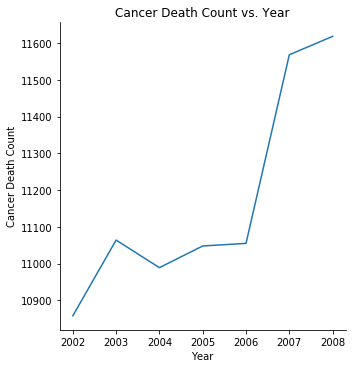

In [20]:
plot_line(df)

## Problem 2.2: Regression Plot

Create a function called `plot_regression` that accepts a Pandas dataframe and crates a linear regression plot between Population and Count for cancer incidence (Event Type = Incidence).

**Please provide a descriptive title and axis labels for your generated visualization.**

In [0]:
# Type your solution here
def plot_regression(df):
  info = df[df['Event Type'] == 'Incidence']
  sns.regplot(x='Population', y='Count', data=info)
  plt.title('Cancer Death Count vs. Population')
  plt.ylabel('Cancer Death Count')

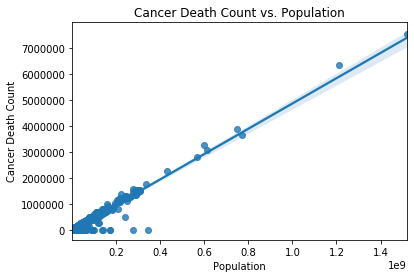

In [22]:
plot_regression(df)

# Problem 3: Discussion



## Problem 3.1
Do you think a line chart is an effective visualization in problem 2.1? Explain in 1-2 sentences why or why not.






Answer: One reason this visualization might not be ideal is that it's only showing the count of cancer rates, but it doesn't take into account the population growth/decrease. It would be hard to make any meaningful conclusions with just the raw count if we didn't take into account any popultion change (for example, maybe the population was growing at the same rate so the cancer )

Another good reason might be that the line chart's y axis is pretty constrained, so this visualization might be over-emphasizing the relative change in cancer rates.

## Problem 3.2
What do you think are the limitations of this dataset?

Answer:This dataset only reveals the count of people who have cancer in some area/time. It might be good to have more individual data to work with here (age, job, types of habits (ie. smoking, drinking)), since it might be hard to draw any meaningful conclusions from this data about what is correlated with cancer and the cause of cancer is likely to be more than a factor of area/time